In [1]:
import numpy as np
import sys
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import interferometer as itf
from scipy.linalg import expm, logm
sys.path.append('../') # Add parent directory to the system path
from boson_sampling_probabilities import output_probability
from direct_decomposition import random_unitary, direct_decomposition
from simulation import run_interferom_simulation, dist_to_state, state_to_dist
from numeric_truncated_unitaries import numeric_truncated_unitary

In [2]:
# Make a random unitary R to simulate
R = random_unitary(3)
print(R)

[[ 0.20779542-0.24044982j  0.6792089 -0.32769822j  0.57260438+0.04917648j]
 [-0.53004173+0.65389121j  0.06575794+0.14135317j  0.48514633-0.17835432j]
 [ 0.17070397-0.40168041j -0.20081831+0.60552154j  0.39664644-0.49517702j]]


In [3]:
initial_dist = [1,0,0]
possible_dists = [[1,0,0], [0,1,0], [0,0,1]] # Every configuration of 1 photon in 3 modes

analytic_probs = dict()
for dist in possible_dists:
    prob = output_probability(initial_dist, dist, R)
    state = dist_to_state(dist)
    analytic_probs[state] = prob

print(analytic_probs)

{'100': 0.10099505473223709, '010': 0.7085179481571771, '001': 0.19048699711058556}


In [4]:
probs_1e3 = run_interferom_simulation(R, initial_dist, 1e3)
probs_1e4 = run_interferom_simulation(R, initial_dist, 1e4)
probs_1e5 = run_interferom_simulation(R, initial_dist, 1e5)

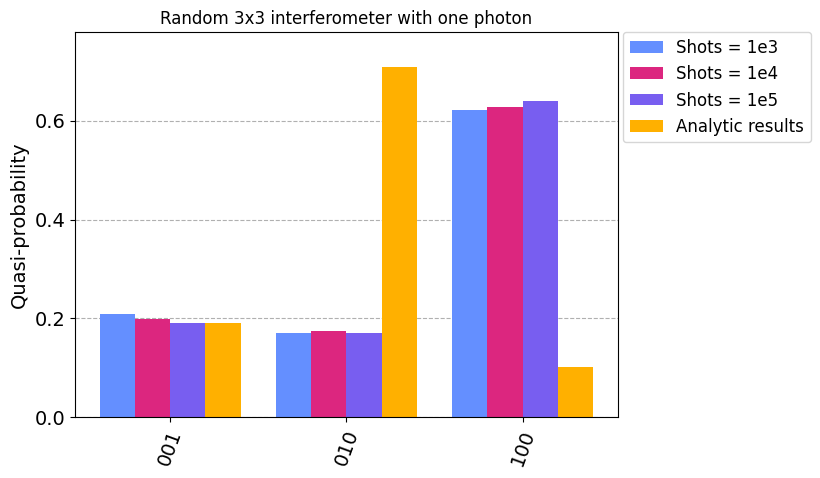

In [5]:
legend = ['Shots = 1e3','Shots = 1e4','Shots = 1e5', 'Analytic results']
plot_histogram([probs_1e3, probs_1e4, probs_1e5, analytic_probs], legend=legend, 
               title='Random 3x3 interferometer with one photon', 
               bar_labels=False)

In [6]:
big_circuit = direct_decomposition(R, 1)

In [7]:
# print(big_circuit)
big_circuit.draw()

»
q_0: ──────────────────────────────────────────────────────────────»
       ┌────────────────────┐         ┌────────────────────┐       »
q_1: ──┤ U3(π/2,π/2,2.8101) ├────■────┤ U3(2.5416,-π,-π/2) ├────■──»
     ┌─┴────────────────────┴─┐┌─┴─┐┌─┴────────────────────┴─┐┌─┴─┐»
q_2: ┤ U3(3.1403,π/2,-1.9839) ├┤ X ├┤ U3(1.571,0.9708,-1.57) ├┤ X ├»
     └────────────────────────┘└───┘└────────────────────────┘└───┘»
«                                               ░  ┌─────────────────────┐ »
«q_0: ──────────────────────────────────────────░──┤ U3(π/2,π/2,0.91175) ├─»
«       ┌────────────────────┐  ┌─────────────┐ ░ ┌┴─────────────────────┴┐»
«q_1: ──┤ U3(π/2,-2.8101,-π) ├──┤ U1(-1.8704) ├─░─┤ U3(3.1403,π/2,2.8377) ├»
«     ┌─┴────────────────────┴─┐└─────────────┘ ░ └───────────────────────┘»
«q_2: ┤ U3(1.5695,-1.1577,π/2) ├────────────────░──────────────────────────»
«     └────────────────────────┘                ░                          »
«              ┌────────────────────┐         ┌─────────────────────┐  »
«q_0: ──■──────┤ U3(2.2581,-π,-π/2) ├─────■───┤ U3(π/2,-0.91175,-π) ├──»
«     ┌─┴─┐┌───┴────────────────────┴──┐┌─┴─┐┌┴─────────────────────┴─┐»
«q_1: ┤ X ├┤ U3(1.5713,0.6873,-1.5698) ├┤ X ├┤ U3(1.5695,0.30392,π/2) ├»
«     └───┘└───────────────────────────┘└───┘└────────────────────────┘»
«q_2: ─────────────────────────────────────────────────────────────────»
«                                                                      »
«     ┌────────────┐ ░                                     »
«q_0: ┤ U1(-2.012) ├─░─────────────────────────────────────»
«     └────────────┘ ░     ┌─────────────────────┐         »
«q_1: ───────────────░─────┤ U3(π/2,-π/2,2.9936) ├──────■──»
«                    ░ ┌───┴─────────────────────┴───┐┌─┴─┐»
«q_2: ───────────────░─┤ U3(0.0013233,-π/2,-0.99786) ├┤ X ├»
«                    ░ └─────────────────────────────┘└───┘»
«                                                                   »
«q_0: ──────────────────────────────────────────────────────────────»
«         ┌────────────────────┐            ┌───────────────────┐   »
«q_1: ────┤ U3(2.3033,-π,-π/2) ├──────■─────┤ U3(π/2,-2.9936,0) ├───»
«     ┌───┴────────────────────┴───┐┌─┴─┐┌──┴───────────────────┴──┐»
«q_2: ┤ U3(1.5712,0.73248,-1.5698) ├┤ X ├┤ U3(1.5721,-2.1437,-π/2) ├»
«     └────────────────────────────┘└───┘└─────────────────────────┘»
«                     ░ 
«q_0: ────────────────░─
«     ┌─────────────┐ ░ 
«q_1: ┤ U1(-5.1311) ├─░─
«     └─────────────┘ ░ 
«q_2: ────────────────░─
«                     ░

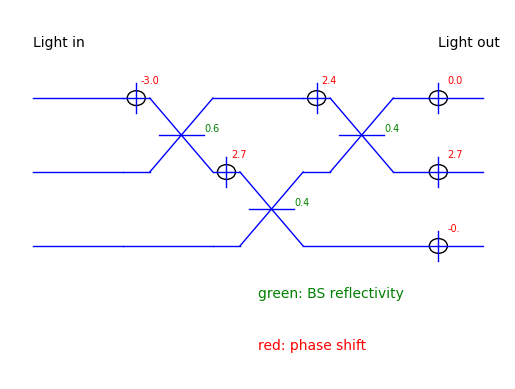

In [8]:
I = itf.square_decomposition(R)
I.draw()

In [9]:
i = itf.Interferometer()
i.add_BS(I.BS_list[0])
r = i.calculate_transformation()
c1 = direct_decomposition(r, 1)
c1.draw()

┌──────────────────────┐          ┌────────────────────┐       »
q_0: ───┤ U3(π/2,-π/2,-1.1169) ├─────■────┤ U3(2.5416,-π,-π/2) ├────■──»
     ┌──┴──────────────────────┴──┐┌─┴─┐┌─┴────────────────────┴─┐┌─┴─┐»
q_1: ┤ U3(0.0013233,-π/2,0.37229) ├┤ X ├┤ U3(1.571,0.9708,-1.57) ├┤ X ├»
     └────────────────────────────┘└───┘└────────────────────────┘└───┘»
«        ┌──────────────────┐   ┌────────────┐ ░ 
«q_0: ───┤ U3(π/2,1.1169,0) ├───┤ U1(-5.012) ├─░─
«     ┌──┴──────────────────┴──┐└────────────┘ ░ 
«q_1: ┤ U3(1.5721,2.7693,-π/2) ├───────────────░─
«     └────────────────────────┘               ░

In [10]:
i = itf.Interferometer()
i.add_BS(I.BS_list[1])
r = i.calculate_transformation()
c2 = direct_decomposition(r, 1)
c2.draw()

░  ┌─────────────────────┐          ┌────────────────────┐   »
q_0: ──────────░──┤ U3(π/2,π/2,0.91175) ├───■──────┤ U3(2.2581,-π,-π/2) ├───»
     ┌───────┐ ░ ┌┴─────────────────────┴┐┌─┴─┐┌───┴────────────────────┴──┐»
q_1: ┤ U1(0) ├─░─┤ U3(3.1403,π/2,2.8377) ├┤ X ├┤ U3(1.5713,0.6873,-1.5698) ├»
     └───────┘ ░ └───────────────────────┘└───┘└───────────────────────────┘»
q_2: ──────────░────────────────────────────────────────────────────────────»
               ░                                                            »
«           ┌─────────────────────┐  ┌────────────┐ ░           ░ 
«q_0: ──■───┤ U3(π/2,-0.91175,-π) ├──┤ U1(-2.012) ├─░───────────░─
«     ┌─┴─┐┌┴─────────────────────┴─┐└────────────┘ ░ ┌───────┐ ░ 
«q_1: ┤ X ├┤ U3(1.5695,0.30392,π/2) ├───────────────░─┤ U1(0) ├─░─
«     └───┘└────────────────────────┘               ░ └───────┘ ░ 
«q_2: ──────────────────────────────────────────────░───────────░─
«                                                   ░           ░

In [11]:
i = itf.Interferometer()
i.add_BS(I.BS_list[2])
r = i.calculate_transformation()
c2 = direct_decomposition(r, 1)
c2.draw()

┌─────────────────────┐             ┌────────────────────┐         »
q_0: ────┤ U3(π/2,-π/2,2.9936) ├──────■──────┤ U3(2.3033,-π,-π/2) ├──────■──»
     ┌───┴─────────────────────┴───┐┌─┴─┐┌───┴────────────────────┴───┐┌─┴─┐»
q_1: ┤ U3(0.0013233,-π/2,-0.99786) ├┤ X ├┤ U3(1.5712,0.73248,-1.5698) ├┤ X ├»
     └─────────────────────────────┘└───┘└────────────────────────────┘└───┘»
«        ┌───────────────────┐   ┌─────────────┐ ░ 
«q_0: ───┤ U3(π/2,-2.9936,0) ├───┤ U1(-5.1311) ├─░─
«     ┌──┴───────────────────┴──┐└─────────────┘ ░ 
«q_1: ┤ U3(1.5721,-2.1437,-π/2) ├────────────────░─
«     └─────────────────────────┘                ░

In [12]:
I.BS_list

[
  Beam splitter between modes 1 and 2: 
  Theta angle: 0.60 
  Phase: -3.06,
 
  Beam splitter between modes 2 and 3: 
  Theta angle: 0.88 
  Phase: 2.79,
 
  Beam splitter between modes 1 and 2: 
  Theta angle: 0.84 
  Phase: 2.42]

In [13]:
u1 = numeric_truncated_unitary(I.BS_list[0].theta, I.BS_list[0].phi, 1)
u2 = numeric_truncated_unitary(I.BS_list[1].theta, I.BS_list[1].phi, 1)
u3 = numeric_truncated_unitary(I.BS_list[2].theta, I.BS_list[2].phi, 1)

u1.shape

(4, 4)